# In this notebook we will run different Machine Learning Models  the augmented datasets and attempt to interpret the models using Eli5, SHAP, lime

In [ ]:
#!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
#!pip install textblob
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
#!pip install langid
#!pip install google_trans_new
#!pip uninstall googletrans
#!pip install gensim
#!pip install keras
#!pip install xgboost
#!pip install nltk
#!pip install eli5
#!pip install shap
#!pip install lime

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud, STOPWORDS 
#from langdetect import detect
from itertools import cycle
#import googletrans
#from googletrans import Translator
#from google_trans_new import google_translator 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#from textblob import TextBlob
#from textblob.translate import NotTranslated
import random
import operator
import math
import tqdm
import time
#import spacy
import json
import tensorflow as tf
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import eli5 as eli
import lime
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from __future__ import print_function
import shap
#import langid 

In [ ]:
dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
#Panda option settings that will be applicable through out this notebook
pd.set_option('max_colwidth', 80)

# Some useful functions
# given a dataframe and a sort sequence, return back the sorted dataframe
def sort_df(df, arr):
    df.sort_values(by=arr, inplace=True, ascending=False)
    df = df.reset_index()
    df = df.drop('index', 1)
    df.index += 1
    return df

# given a sequence of attributes and a dataframe, return dataframe sorted by descending order of importance
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance',
                        ascending = False).reset_index(drop = True)
    return df

def print_classification_report(X_test,y_test):
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

    
def print_confusion_matrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)  
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)

### This section below contains  Useful Functions 
- As we find new functions, we will create them here.

### In this notebook we will show all ML Models with results using dataset after augmentation round 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#mydata = pd.read_csv('datasets/input_data_after_preprocessing_for_ml.csv')
augmented_df = pd.read_csv('drive/MyDrive/datasets/pre_data_dl_aug2.csv')
#mydata = pd.read_excel("datasets/input_data.xlsx")
#mydata = pd.read_pickle('datasets/preprocesseddata_mldl.pkl')

In [ ]:
df2 = augmented_df
augmented_df['Assignment group by number'] = augmented_df['Assignment group'].str[4:]
augmented_df['Assignment group by number'] = augmented_df['Assignment group by number'].astype(int)
augmented_df

,Unnamed: 0,Combined Description Cleaned,Assignment group,LabelEncodings,Assignment group by number
0,0,login issue user manager name checked the name in ad and reset password advi...,GRP_0,0,0
1,1,outlook received from hello team my are not in calendar can somebody please ...,GRP_0,0,0
2,2,cannot log in to received from hi i cannot on best,GRP_0,0,0
3,3,unable to access tool page,GRP_0,0,0
4,4,error,GRP_0,0,0
...,...,...,...,...,...
31216,14776,setup eu difficult we,GRP_24,17,24
31217,14777,configuration eu easier we,GRP_24,17,24
31218,14778,disable eu tool we,GRP_24,17,24
31219,14779,configure eu use we,GRP_24,17,24


In [ ]:
augmented_df['Assignment group'].unique().tolist()

['GRP_0',
 'GRP_1',
 'GRP_3',
 'GRP_4',
 'GRP_5',
 'GRP_6',
 'GRP_7',
 'GRP_8',
 'GRP_9',
 'GRP_10',
 'GRP_11',
 'GRP_12',
 'GRP_13',
 'GRP_14',
 'GRP_15',
 'GRP_16',
 'GRP_17',
 'GRP_18',
 'GRP_19',
 'GRP_2',
 'GRP_20',
 'GRP_21',
 'GRP_22',
 'GRP_23',
 'GRP_24',
 'GRP_25',
 'GRP_26',
 'GRP_27',
 'GRP_28',
 'GRP_29',
 'GRP_30',
 'GRP_31',
 'GRP_33',
 'GRP_34',
 'GRP_35',
 'GRP_36',
 'GRP_37',
 'GRP_38',
 'GRP_39',
 'GRP_40',
 'GRP_41',
 'GRP_42',
 'GRP_43',
 'GRP_44',
 'GRP_45',
 'GRP_46',
 'GRP_47',
 'GRP_48',
 'GRP_49',
 'GRP_50',
 'GRP_51',
 'GRP_52',
 'GRP_53',
 'GRP_54',
 'GRP_55',
 'GRP_56',
 'GRP_57',
 'GRP_58',
 'GRP_59',
 'GRP_60',
 'GRP_61',
 'GRP_32',
 'GRP_62',
 'GRP_63',
 'GRP_64',
 'GRP_65',
 'GRP_66',
 'GRP_67',
 'GRP_68',
 'GRP_69',
 'GRP_70',
 'GRP_71',
 'GRP_72',
 'GRP_73']

In [ ]:
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(augmented_df['Combined Description Cleaned'])
#print(X_train_counts.shape)

In [ ]:
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#print(X_train_tfidf.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(augmented_df['Combined Description Cleaned'])

In [ ]:
y = augmented_df['Assignment group by number']

In [ ]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
print(len(tfidf_vectorizer.vocabulary_))

4398


In [ ]:
print(X_train.shape)
print(y_train.shape)

(21854, 4398)
(21854,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(9367, 4398)
(9367,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       896
           1       1.00      0.46      0.63        65
           2       0.73      0.87      0.79       572
           3       0.72      0.81      0.76       479
           4       0.89      0.72      0.80       229
           5       0.74      0.37      0.50       180
           6       0.78      0.72      0.75       229
           7       0.92      0.84      0.88       155
           8       0.67      0.92      0.78       822
           9       0.82      0.61      0.70       239
          10       0.84      0.83      0.83       194
          11       0.93      0.86      0.89        58
          12       0.76      0.84      0.80       561
          13       0.78      0.90      0.84       324
          14       0.84      0.79      0.82       260
          15       0.98      0.75      0.85        85
          16       0.88      0.93      0.90       226
          17       0.84    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


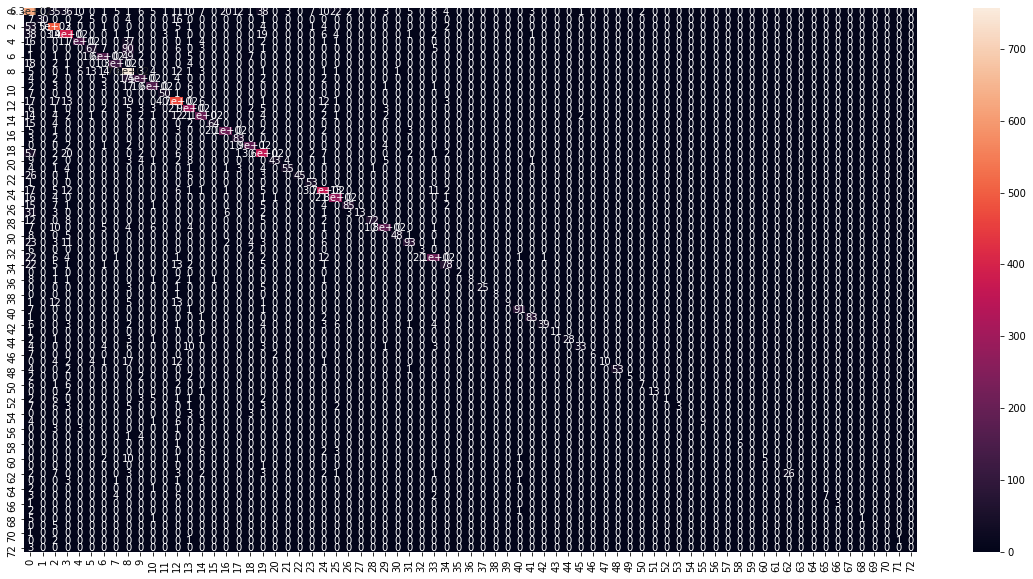

In [ ]:
print_confusion_matrix(y_test,y_pred)

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print("Logistic Regression Score: ", acc_score)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f1_score)
precision_score = metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall_score = metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('f1 score: {:.2%}'.format(f1_score))
print('Precison Score : {:.2%}'.format(precision_score))
print('Recall score: {:.2%}'.format(recall_score))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = accuracy_score(y_test, y_pred)
dfObj = dfObj.append({'Algorithm' : 'LR   {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score),
                      'Precision Score': '{:.2%}'.format(precision_score),
                      'Recall Score': '{:.2%}'.format(recall_score) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

Logistic Regression Score:  0.7664140066189815
Logistic Regression F1 Score:  0.7626347903176117
f1 score: 76.26%
Precison Score : 79.33%
Recall score: 77.06%


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.64%,76.26%,79.33%,77.06%


In [ ]:
print(X_test[1])

  (0, 3949)	0.2884381341948086
  (0, 2040)	0.25594377529690765
  (0, 1634)	0.21160217527465577
  (0, 1273)	0.23286909798870814
  (0, 3554)	0.2129320133198174
  (0, 3396)	0.13993436688445754
  (0, 249)	0.2768652398707554
  (0, 2701)	0.23184202982741797
  (0, 598)	0.2707395991103861
  (0, 3763)	0.22910604339887494
  (0, 2057)	0.1761484875691105
  (0, 3171)	0.1558508125414786
  (0, 987)	0.2184877712275213
  (0, 746)	0.16472554227659778
  (0, 1119)	0.14167683062519573
  (0, 1705)	0.10853562630629938
  (0, 1621)	0.17072857475564085
  (0, 4277)	0.14946342518443834
  (0, 4004)	0.18492079840214382
  (0, 131)	0.12743505314936493
  (0, 721)	0.12550024109619617
  (0, 1995)	0.07852159023852255
  (0, 2569)	0.0977138084236436
  (0, 1307)	0.12304603748937243
  (0, 21)	0.12702480291228346
  (0, 2584)	0.18167955724483503
  (0, 2454)	0.13218001634057017
  (0, 1575)	0.08001132184982845
  (0, 3082)	0.09306828895682409
  (0, 3935)	0.0680679639889799
  (0, 149)	0.08905676182305687
  (0, 1858)	0.078649451075

In [ ]:
y_test

3061      0
10356    19
19148    13
3818      8
20646     8
         ..
28053    33
2642      2
22042     6
9884     13
13001    24
Name: Assignment group by number, Length: 9367, dtype: int64

In [ ]:
print(y_test[10356])

19


In [ ]:
y_pred2 = clf.predict(X_test[1])  

In [ ]:
X_inv = tfidf_vectorizer.inverse_transform(X_test[1])

In [ ]:
X_inv

[array(['tooling', 'keep', 'going', 'engineer', 'someone', 'see', 'assume',
        'partner', 'channel', 'take', 'know', 'remote', 'dell', 'computer',
        'do', 'have', 'getting', 'will', 'trying', 'am', 'company', 'is',
        'of', 'error', 'access', 'on', 'my', 'from', 'received', 'to',
        'and', 'in', 'the', 'issue'], dtype='<U20')]

In [ ]:
y_pred2

array([19])

## ELI5 is a python package that is used to inspect ML classifiers and explain their predictions. It is popularly used to debug algorithms such as sklearn regressors and classifiers, XGBoost, CatBoost, Keras, etc.

In [ ]:
eli.explain_prediction(clf ,X_test[1])

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=1000,\n                   multi_class='multinomial', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=3.212410978181621, std=None, value=1.0), FeatureWeight(feature='x2454', weight=0.4379030465157506, std=None, value=0.13218001634057017), FeatureWeight(feature='x2040', weight=0.34119325477000706, std=None, value=0.25594377529690765), FeatureWeight(feature='x2007', weight=0.3149452602416136, std=None, value=0.12429478018957775), FeatureWeight(feature='x3082', weight=0.3069415404541458, std=None, value=0.09306828895682409), FeatureWeight(feature='x21', weight=0.24677990800619565, std=None, value=0.12702480291228346), FeatureWeight(feature='x2584', weight=0.22646801936707414, std=None, value=0.18167955724483503), FeatureWeight(feature='x3763', weight=0.22162667339867476, std=None, value=0.22910604339887494), FeatureWeight(feature='x131', weight=0.20881781022207346, std=None, value=0.12743505314936493), FeatureWeight(feature='x4004', weight=0.1965918335074923, std=None, value=0.18492079840214382), FeatureWeight(feature='x987', weight=0.18021339672493805, std=None, value=0.2184877712275213), FeatureWeight(feature='x1575', weight=0.13948334967974516, std=None, value=0.08001132184982845), FeatureWeight(feature='x721', weight=0.1385047843139891, std=None, value=0.12550024109619617), FeatureWeight(feature='x3935', weight=0.1329061932541537, std=None, value=0.0680679639889799), FeatureWeight(feature='x1621', weight=0.08195576124114927, std=None, value=0.17072857475564085), FeatureWeight(feature='x746', weight=0.03248651345484622, std=None, value=0.16472554227659778), FeatureWeight(feature='x1273', weight=0.011288826839486652, std=None, value=0.23286909798870814), FeatureWeight(feature='x1307', weight=0.004790371783656935, std=None, value=0.12304603748937243)], neg=[FeatureWeight(feature='x1634', weight=-0.40807494664247784, std=None, value=0.21160217527465577), FeatureWeight(feature='x249', weight=-0.19296530186894106, std=None, value=0.2768652398707554), FeatureWeight(feature='x3845', weight=-0.17586222938748472, std=None, value=0.06877963067659855), FeatureWeight(feature='x3949', weight=-0.15054522714758878, std=None, value=0.2884381341948086), FeatureWeight(feature='x3554', weight=-0.13190676531606194, std=None, value=0.2129320133198174), FeatureWeight(feature='x149', weight=-0.131792075296695, std=None, value=0.08905676182305687), FeatureWeight(feature='x1995', weight=-0.11907217437466164, std=None, value=0.07852159023852255), FeatureWeight(feature='x1858', weight=-0.11473221487707606, std=None, value=0.07864945107583089), FeatureWeight(feature='x2701', weight=-0.09867689802683745, std=None, value=0.23184202982741797), FeatureWeight(feature='x4277', weight=-0.07984363638087584, std=None, value=0.14946342518443834), FeatureWeight(feature='x2569', weight=-0.07053501382282637, std=None, value=0.0977138084236436), FeatureWeight(feature='x2057', weight=-0.061665479992540934, std=None, value=0.1761484875691105), FeatureWeight(feature='x3396', weight=-0.05942140304852161, std=None, value=0.13993436688445754), FeatureWeight(feature='x1119', weight=-0.04936139703838164, std=None, value=0.14167683062519573), FeatureWeight(feature='x598', weight=-0.040830499346821265, std=None, value=0.2707395991103861), FeatureWeight(feature='x1705', weight=-0.014374917579327141, std=None, value=0.10853562630629938), FeatureWeight(feature='x3171', weight=-0.013487914211088223, std=None, value=0.1558508125414786)], pos_remaining=0, neg_remaining=0), proba=0.21496467719072002, score=4.522159427598406, weighted_spans=None, 